In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import regularizers
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder


In [129]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU'))) 

Num GPUs Available:  0


In [130]:
df_train = pd.read_csv('C:/Users/winni/Desktop/Classes/DAT555/Titanic/train.csv')
df_test = pd.read_csv('C:/Users/winni/Desktop/Classes/DAT555/Titanic/test.csv')

# Data Dictionary

<b>Survived:</b> Passenger surived or not<br>
<b>PClass:</b> Proxy for Socio-economic status(1 = first class, 2 = second class, 3 = third class) <br>
<b>Sex:</b> Sex of Passenger<br>
<b>Age:</b> Age of Passenger<br>
<b>SibSp:</b> Spouses or Sibling of passenger (Includes Step Siblings)<br>
<b>Parch:</b> Number of Parents and Children (Including stepchildren) children with parch = 0 traveled with nanny<br>
<b>Ticket:</b> Ticket Number of Passenger<br>
<b>Fare:</b> Passenger Fare<br>
<b>Cabin:</b> Cabin number<br>
<b>Embarked:</b> Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)<br>


In [131]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [132]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [133]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', "Cabin"], axis=1)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', "Cabin"], axis=1)

In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [135]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [136]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Data Analysis

Added Variables isAlone and Family size:<br>
- FamilySize = SibSp + Parch
- isAlone: 1 = Alone, 0 = Not Alone


<br><br>
<b>PClass:</b> Your economic class influenced whether you survived or not. Upperclass had higher survival rates.<br>
<b>Sex:</b> Females were more likely to survive than males.<br>
<b>isAlone/FamilySize:</b> Passengers with no family were less likely to survive than passengers with any kind of family. However, passengers with family in the range of 1-3 were the likeliest group to survive and passengers with more than 3 family members had even lower rates of survival than people with no family members.<br>
<b>Embarked:</b> Where you embarked from seems to influence survival. May have to do with class system.<br>

In [137]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train['isAlone'] = 0
df_train.loc[df_train['FamilySize'] == 0, 'isAlone'] = 1

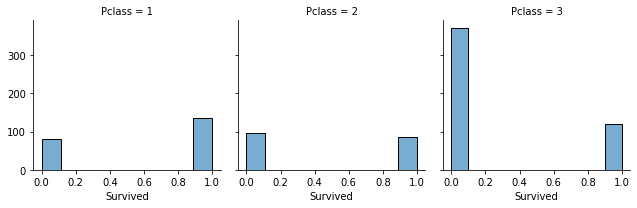

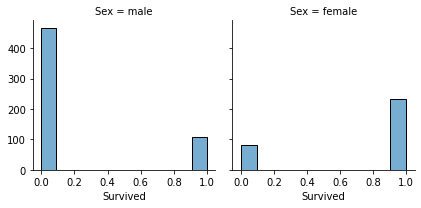

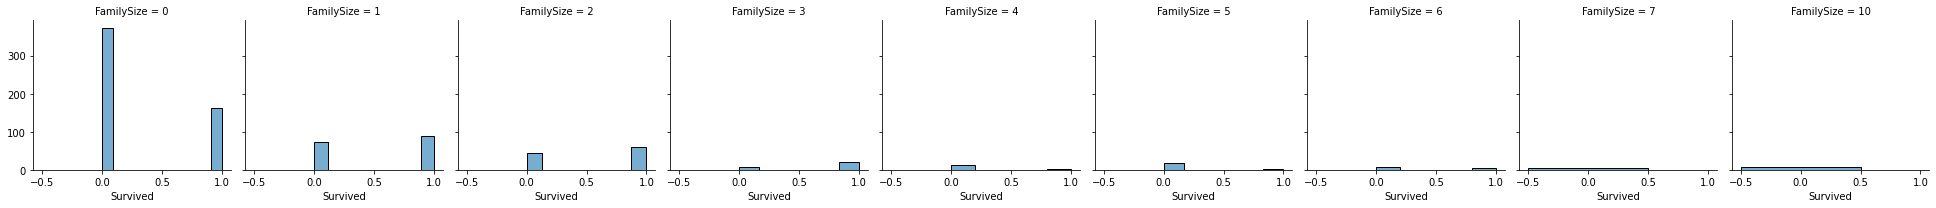

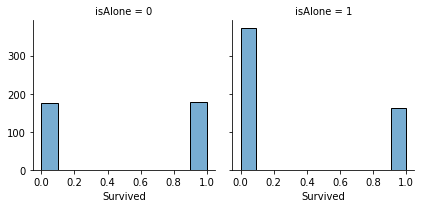

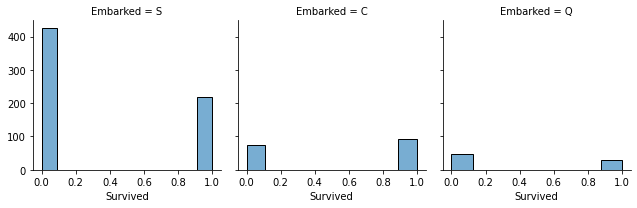

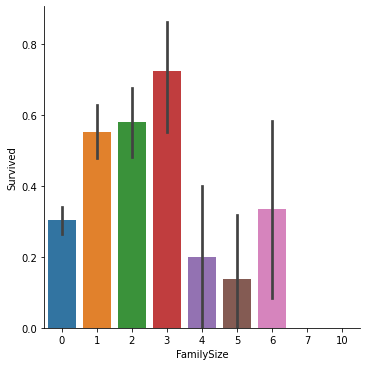

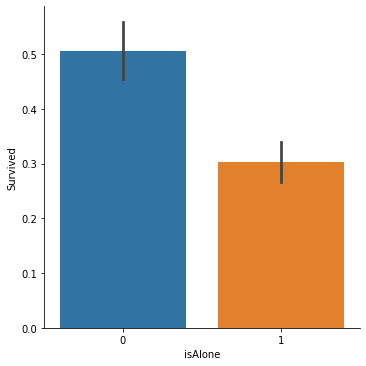

In [138]:
features = [
        "Pclass",
        "Sex",
        "FamilySize",
        "isAlone",
        "Embarked"
    ]

for f in features:
    g = sns.FacetGrid(df_train, col=f)
    g.map(sns.histplot, "Survived", alpha=0.6)

sns.catplot(x="FamilySize", y="Survived", kind="bar", data=df_train)
sns.catplot(x="isAlone", y="Survived", kind="bar", data=df_train)        

#### Age

Age is an interesting attribute when relating to survival. While age was a factor in whether you survived or not, comparing it to sex, pclass, or family size shows a different perspective.

<b>Takeaways</b>
- Children(0-15) and Adults(26-60) are more likely to survive than Young Adults(16-26) and Senior(60+) passenegers.
- Female Passengers increased likelyhood of survival across all age groups and Males had decrease in survival at all age groups.
- Upperclass Passengers increased survival rates at all ages except the senior group.
- Having family aboard(isAlone = 0) increased survival rates at all ages except the senior group, which had a small increase if alone.


In [139]:
df_train['Age_Bin']=pd.cut(x = df_train['Age'],
                        bins = [0,16,26,60,100], 
                        labels = ["Child", "Young_Adult", "Adult","Senior"])

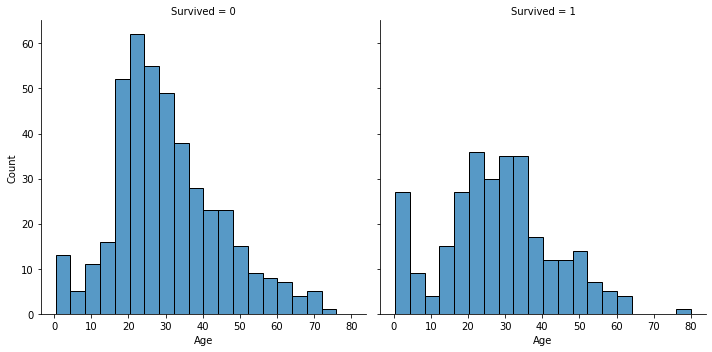

In [140]:
sns.displot(df_train, x="Age", col="Survived")

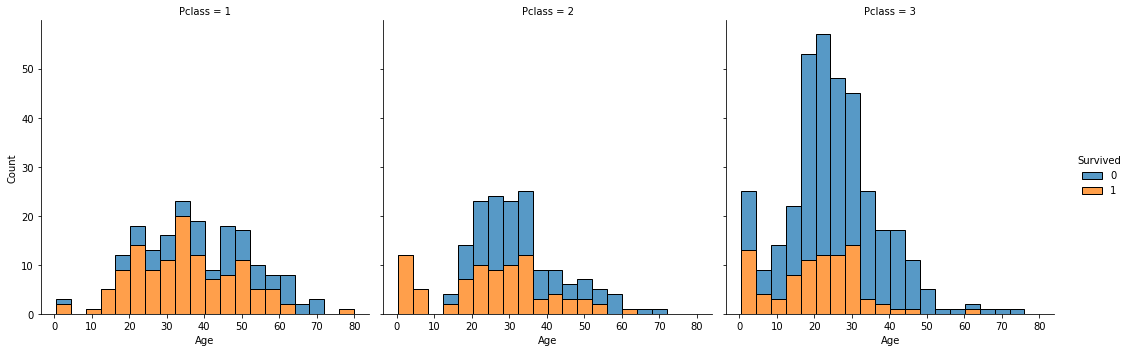

In [141]:
sns.displot(df_train, x="Age", hue="Survived", col="Pclass", multiple = "stack")

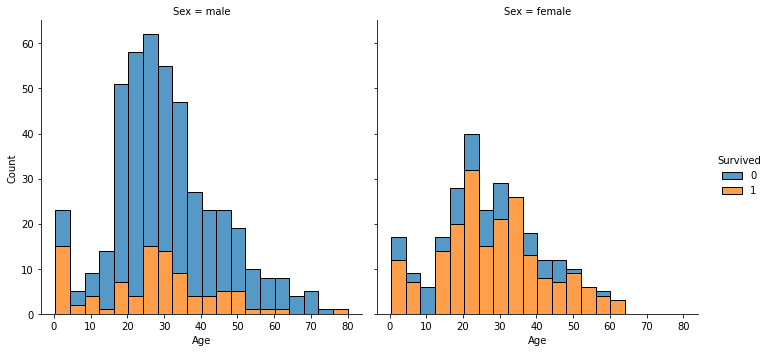

In [142]:
sns.displot(df_train, x="Age", hue="Survived", col="Sex", multiple = "stack")

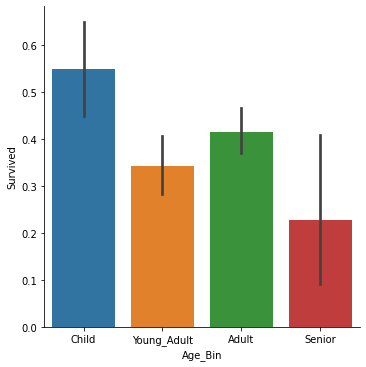

In [143]:
sns.catplot(x="Age_Bin", y="Survived", kind="bar", data=df_train)

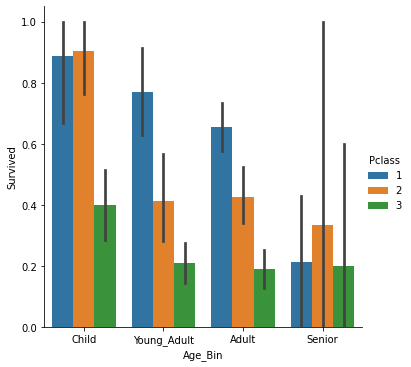

In [144]:
sns.catplot(x="Age_Bin", y="Survived", hue="Pclass", kind="bar", data=df_train)

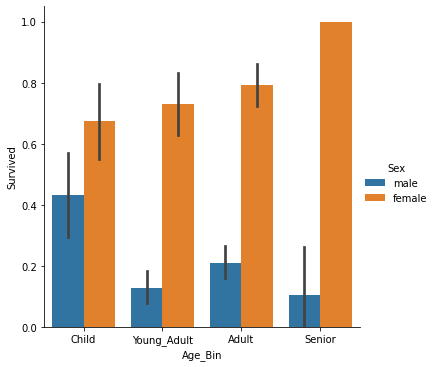

In [145]:
sns.catplot(x="Age_Bin", y="Survived", hue="Sex", kind="bar", data=df_train)

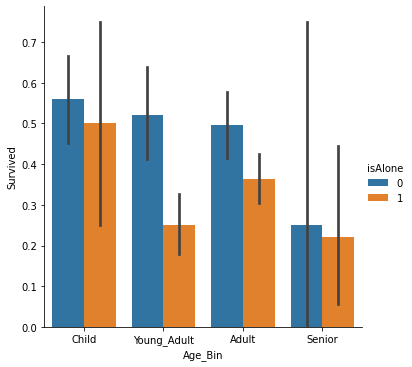

In [146]:
sns.catplot(x="Age_Bin", y="Survived", hue="isAlone", kind="bar", data=df_train)

# Data Cleaning

- Imputed missing Age values with the average age grouped by PClass and Sex.
- The two passengers with missing embarked most likely came from Cherbourg.
- Changed Embarked C, Q, S to 0, 1 , 2, respectively.
- Changed Sex F, M to 0, 1, respectively.
- Dropped Age_Bin Column

In [153]:
df_train = df_train.drop(["Age_Bin"], axis=1)

In [147]:
columns = df_test.columns
for i in range(len(columns)):
    print(columns[i],'--->',"train:",df_train[columns[i]].isnull().sum(),
         "|","test:",df_test[columns[i]].isnull().sum()) 

Pclass ---> train: 0 | test: 0
Sex ---> train: 0 | test: 0
Age ---> train: 177 | test: 86
SibSp ---> train: 0 | test: 0
Parch ---> train: 0 | test: 0
Fare ---> train: 0 | test: 1
Embarked ---> train: 2 | test: 0


In [148]:
df_train['Age'] = df_train.groupby(['Pclass','Sex'], sort=False)['Age'].apply(lambda x: x.fillna(x.mode().iloc[0]))
df_test['Age'] = df_test.groupby(['Pclass','Sex'], sort=False)['Age'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [149]:
df_train[df_train['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,Age_Bin
61,1,1,female,38.0,0,0,80.0,NaN,0,1,Adult
829,1,1,female,62.0,0,0,80.0,NaN,0,1,Senior


In [150]:
print(df_train.groupby('Embarked').mean()['Fare'])

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


In [151]:
print(df_train.groupby('Embarked').mean()['Pclass'])

Embarked
C    1.886905
Q    2.909091
S    2.350932
Name: Pclass, dtype: float64


In [152]:
df_train['Embarked'] = df_train['Embarked'].fillna("C")

# TEST ONE HOT ENCODING

In [154]:
train_test = df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,1
887,1,1,female,19.0,0,0,30.0000,S,0,1
888,0,3,female,18.0,1,2,23.4500,S,3,0
889,1,1,male,26.0,0,0,30.0000,C,0,1


# END TEST

In [121]:
Embarked = {'C': 0, 'Q': 1, 'S': 2}
df_train.Embarked = [Embarked[item] for item in df_train.Embarked]

df_test.Embarked = [Embarked[item] for item in df_test.Embarked]

In [123]:
Sex = {'female': 0, 'male': 1}
df_train.Sex = [Sex[item] for item in df_train.Sex]

df_test.Sex = [Sex[item] for item in df_test.Sex]

In [126]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone
0,0,3,1,22.0,1,0,7.2500,2,1,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,0,1
3,1,1,0,35.0,1,0,53.1000,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,0,1
887,1,1,0,19.0,0,0,30.0000,2,0,1
888,0,3,0,18.0,1,2,23.4500,2,3,0
889,1,1,1,26.0,0,0,30.0000,0,0,1


### Feature Engineering